Datasets
Data is separated into two datasets: information about the identity of the customer and transaction information. bold text

train_transaction : contains 590,540 rows and 394 features.
train_identity: contains 144,233 rows and 41 features.

Características da transação:

TransactionDT: Timedelta de um determinado datetime de referência (não um timestamp real), mas a diferença de tempo em segundos de um determinado horário.
TransactionAMT: Valor do pagamento da transação em USD, vale a pena prestar atenção na parte decimal.
ProductCD: Código do produto, o produto para cada transação. Pode não ser necessariamente um produto real, mas também pode se referir a um serviço.
card1-card6: Informações do cartão de pagamento, como tipo de cartão, categoria do cartão, banco emissor, país, etc.
addr1-addr2: Endereço, região de cobrança e país de cobrança
dist: Distâncias entre (não limitado) endereço de cobrança, endereço de correspondência, código postal, endereço IP, área de telefone, etc.
P_ e (R__) domínio de e-mail: domínio de e-mail do comprador e do destinatário, algumas transações não exigem o destinatário e o Remaildomain correspondente está vazio
C1-C14: Contagem, como quantos endereços estão associados ao cartão de pagamento, etc.
D1-D15: Timedelta, como dias entre transações anteriores, etc.
M1-M9: Correspondência, como nomes no cartão e endereço, etc.
Vxxx: Vesta desenvolveu recursos avançados, incluindo classificação, contagem e outras relações entre entidades. Alguns recursos V estão faltando em diferentes proporções.

Características de identidade:

id_01-id_11: Recursos numéricos para identidade, que são coletados pela Vesta e parceiros de segurança, como classificação do dispositivo, classificação ip_domain, classificação proxy etc. na página etc
DeviceType, DeviceInfo e id_12-id_38: recursos categóricos

In [1]:
#Bibliotecas
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import gc
import os
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Carregando os dados
train_identity = pd.read_csv('train_identity.csv')
train_transaction = pd.read_csv('train_transaction.csv')

#Efetuar o merge pela coluna TransactionID
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')


In [3]:
train.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


In [4]:
train.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [5]:
print(f"Dataset Shape: {train.shape}")
   # table = pd.DataFrame(train.dtypes,columns=['dtypes']))
  #  table = summary.reset_index()
  #  table['Name'] = summary['index']
  #  table = summary[['Name','dtypes']]
  #  table['Missing'] = df.isnull().sum().values    
 #   table['Uniques'] = df.nunique().values
 #   table['First Value'] = df.loc[0].values
 #   table['Second Value'] = df.loc[1].values
 #   table['Third Value'] = df.loc[2].values

#print(table)

Dataset Shape: (590540, 434)


In [6]:
#Verificando os NAN e dados faltantes
for i in train.columns:
    print(i,'Total de dados NAN:',train[i].isnull().sum(),end="\n")


TransactionID Total de dados NAN: 0
isFraud Total de dados NAN: 0
TransactionDT Total de dados NAN: 0
TransactionAmt Total de dados NAN: 0
ProductCD Total de dados NAN: 0
card1 Total de dados NAN: 0
card2 Total de dados NAN: 8933
card3 Total de dados NAN: 1565
card4 Total de dados NAN: 1577
card5 Total de dados NAN: 4259
card6 Total de dados NAN: 1571
addr1 Total de dados NAN: 65706
addr2 Total de dados NAN: 65706
dist1 Total de dados NAN: 352271
dist2 Total de dados NAN: 552913
P_emaildomain Total de dados NAN: 94456
R_emaildomain Total de dados NAN: 453249
C1 Total de dados NAN: 0
C2 Total de dados NAN: 0
C3 Total de dados NAN: 0
C4 Total de dados NAN: 0
C5 Total de dados NAN: 0
C6 Total de dados NAN: 0
C7 Total de dados NAN: 0
C8 Total de dados NAN: 0
C9 Total de dados NAN: 0
C10 Total de dados NAN: 0
C11 Total de dados NAN: 0
C12 Total de dados NAN: 0
C13 Total de dados NAN: 0
C14 Total de dados NAN: 0
D1 Total de dados NAN: 1269
D2 Total de dados NAN: 280797
D3 Total de dados NAN:

V259 Total de dados NAN: 449124
V260 Total de dados NAN: 460110
V261 Total de dados NAN: 460110
V262 Total de dados NAN: 460110
V263 Total de dados NAN: 460110
V264 Total de dados NAN: 460110
V265 Total de dados NAN: 460110
V266 Total de dados NAN: 460110
V267 Total de dados NAN: 460110
V268 Total de dados NAN: 460110
V269 Total de dados NAN: 460110
V270 Total de dados NAN: 449124
V271 Total de dados NAN: 449124
V272 Total de dados NAN: 449124
V273 Total de dados NAN: 460110
V274 Total de dados NAN: 460110
V275 Total de dados NAN: 460110
V276 Total de dados NAN: 460110
V277 Total de dados NAN: 460110
V278 Total de dados NAN: 460110
V279 Total de dados NAN: 12
V280 Total de dados NAN: 12
V281 Total de dados NAN: 1269
V282 Total de dados NAN: 1269
V283 Total de dados NAN: 1269
V284 Total de dados NAN: 12
V285 Total de dados NAN: 12
V286 Total de dados NAN: 12
V287 Total de dados NAN: 12
V288 Total de dados NAN: 1269
V289 Total de dados NAN: 1269
V290 Total de dados NAN: 12
V291 Total de 

In [7]:
#Total de valores faltantes
print("train % of missing data = ", "%.2f%%" % (100 * train.isnull().sum().sum() / np.product(train.shape)))

train % of missing data =  45.07%


In [8]:
#Tratamento para NAN
train = train.fillna(0)

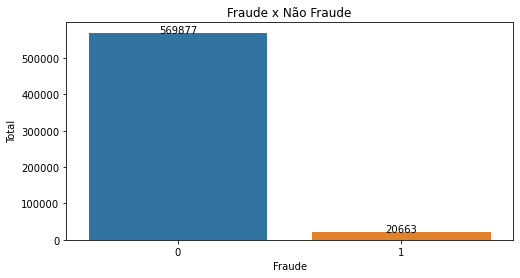

In [9]:
labels=train['isFraud'].value_counts().index
values=train['isFraud'].value_counts().values

plt.figure(figsize = (8, 4))
ax = sns.barplot(x=labels, y=values)
ax.set_title('Fraude x Não Fraude')
ax.set_ylabel('Total')
ax.set_xlabel('Fraude')
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height, values[i],ha="center")

In [10]:
#Tratamento para melhorar a coluna DeviceInfo
train.loc[train['DeviceInfo'].str.contains('SM', na=False), 'DeviceInfo'] = 'Samsung'
train.loc[train['DeviceInfo'].str.contains('SAMSUNG', na=False), 'DeviceInfo'] = 'Samsung'
train.loc[train['DeviceInfo'].str.contains('GT-', na=False), 'DeviceInfo'] = 'Samsung'
train.loc[train['DeviceInfo'].str.contains('Moto G', na=False), 'DeviceInfo'] = 'Motorola'
train.loc[train['DeviceInfo'].str.contains('Moto', na=False), 'DeviceInfo'] = 'Motorola'
train.loc[train['DeviceInfo'].str.contains('moto', na=False), 'DeviceInfo'] = 'Motorola'
train.loc[train['DeviceInfo'].str.contains('LG-', na=False), 'DeviceInfo'] = 'LG'
train.loc[train['DeviceInfo'].str.contains('rv:', na=False), 'DeviceInfo'] = 'RV'
train.loc[train['DeviceInfo'].str.contains('HUAWEI', na=False), 'DeviceInfo'] = 'Huawei'
train.loc[train['DeviceInfo'].str.contains('ALE-', na=False), 'DeviceInfo'] = 'Huawei'
train.loc[train['DeviceInfo'].str.contains('-L', na=False), 'DeviceInfo'] = 'Huawei'
train.loc[train['DeviceInfo'].str.contains('Blade', na=False), 'DeviceInfo'] = 'ZTE'
train.loc[train['DeviceInfo'].str.contains('BLADE', na=False), 'DeviceInfo'] = 'ZTE'
train.loc[train['DeviceInfo'].str.contains('Linux', na=False), 'DeviceInfo'] = 'Linux'
train.loc[train['DeviceInfo'].str.contains('XT', na=False), 'DeviceInfo'] = 'Sony'
train.loc[train['DeviceInfo'].str.contains('HTC', na=False), 'DeviceInfo'] = 'HTC'
train.loc[train['DeviceInfo'].str.contains('ASUS', na=False), 'DeviceInfo'] = 'Asus'

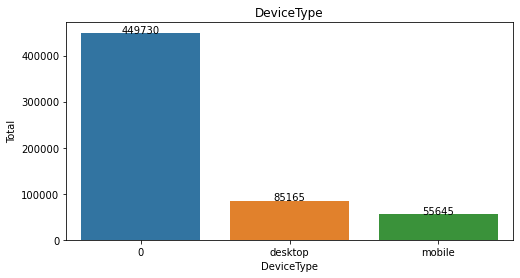

In [11]:
labels=train['DeviceType'].value_counts().index
values=train['DeviceType'].value_counts().values

plt.figure(figsize = (8, 4))
ax = sns.barplot(x=labels, y=values)
ax.set_title('DeviceType')
ax.set_ylabel('Total')
ax.set_xlabel('DeviceType')
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height, values[i],ha="center")

     

In [ ]:
f,ax=plt.subplots(1,2, figsize=(15,6))
cnt= sns.countplot('ProductCD',palette='Blues',data=train, ax=ax[0])
ax[0].set_title('ProductCD')
ax[0].set_ylabel('')
ax[0].set_yticklabels('')

cnt2 = sns.countplot('DeviceInfo',hue='isFraud', data=train, ax=ax[1])
ax[1].set_title('Fraud vs No Fraud')
ax[1].legend(['No Fraud','Fraud'])
ax[1].set_ylabel('')
ax[1].set_yticklabels('')

plt.show()

In [ ]:
ax = sns.countplot(y="DeviceType", data=train)
plt.title('Distribution of  Configurations')
plt.xlabel('Number of Axles')

total = len(train['DeviceType'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()




In [ ]:
# converte colunas categóricas em numéricas
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
for col in categorical_cols:
    df[col] = pd.factorize(df[col])[0]


In [ ]:
# divide os dados em treino e teste
X = df.drop(['isFraud'], axis=1)
y = df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# aplica escala padrão
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# cria e treina os modelos
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# faz a predição nos dados de teste
y_pred_svc = svc.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_knn = knn.predict(X_test)

# calcula as métricas de desempenho
print('SVC:')
print(classification_report(y_test, y_pred_svc))
print('Random Forest:')
print(classification_report(y_test, y_pred_rf))
print('Logistic Regression:')
print(classification_report(y_test, y_pred_lr))
print('KNN:')
print(classification_report(y_test, y_pred_knn))


In [ ]:
# compara as métricas de desempenho
print('Acurácia:')
print('SVC:', accuracy_score(y_test, y_pred_svc))
print('Random Forest:', accuracy_score(y_test, y_pred_rf))
print('Logistic Regression:', accuracy_score(y_test, y_pred_lr))
print('KNN:', accuracy_score(y_test, y_pred_knn))

print('Matriz de Confusão:')
print('SVC:')
print(confusion_matrix(y_test, y_pred_svc))
print('Random Forest:')
print(confusion_matrix(y_test, y_pred_rf))
print('Logistic Regression:')
print(confusion_matrix(y_test


In [ ]:
#Transformer
# Cria o modelo Transformer
transformer = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu')
])

# Treina o modelo Transformer
transformer.compile(optimizer='adam', loss='mse')
transformer.fit(X_train, X_train, epochs=10, batch_size=32)

# Aplica o Transformer nos dados de treino e teste
X_train_transformed = transformer.predict(X_train)
X_test_transformed = transformer.predict(X_test)
